In [47]:
import numpy as np
import matplotlib.pyplot as plt
from ode_solve import adaptive_RK

In [48]:
"""two parallel first-order reaction A→C and B→D"""

Da1 = 10.
Da2 = 2.75
beta1 = 0.04
beta2 = 0.0149
alpha = 250.
gamma1 = 25
gamma2 = 25

def Q_gen(Y, Z, T):
    return beta1 * Y * Da1 * np.exp(gamma1 * T / (1 + T)) + \
           beta2 * Z * Da2 * np.exp(gamma2 * T / (1 + T))

def dydt(y):
    Y, Z, T = y
    kY = 1 - Y - Y * Da1 * np.exp(gamma1 * T / (1 + T))
    kZ = 1 - Z - Z * Da2 * np.exp(gamma2 * T / (1 + T))
    kT = alpha * (Q_gen(Y, Z, T) - T)
    return np.array([kY, kZ, kT])

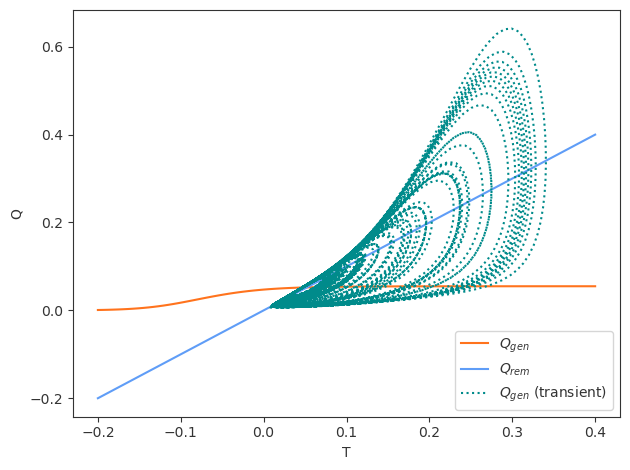

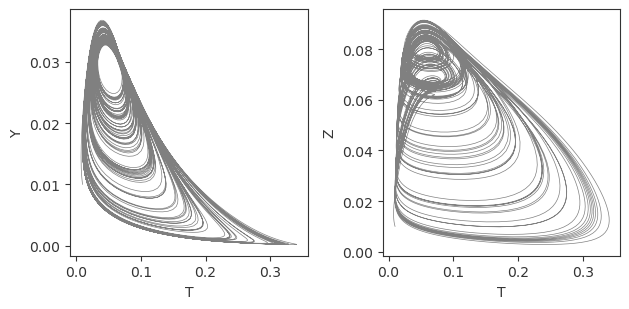

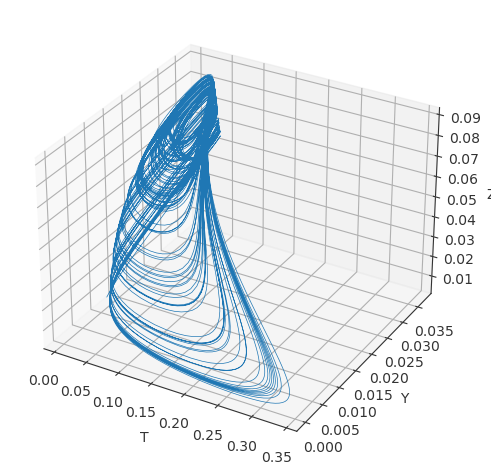

In [49]:
t_max = 10
dt = 0.1

T_lim = -0.2, 0.4
initials = np.array([[0.01, 0.01, 0.01]])
paths = []
Q_gen_list = []

for val in initials:
    t = np.zeros(1)
    Y = np.array([val[0]])
    Z = np.array([val[1]])
    T = np.array([val[2]])
    Q_gen_transient = Q_gen(Y[-1], Z[-1], T[-1])

    while t[-1] < t_max:
        y0 = np.array([Y[-1], Z[-1], T[-1]])
        y, dt, dt_new = adaptive_RK(dydt, y0, dt=dt, tol=1e-8)
        Y_new, Z_new, T_new = y

        t = np.append(t, t[-1] + dt)
        Y = np.append(Y, Y_new)
        Z = np.append(Z, Z_new)
        T = np.append(T, T_new)
        Q_gen_transient = np.append(Q_gen_transient, Q_gen(Y_new, Z_new, T_new))

        if T_new > T_lim[1]: break
        dt = dt_new

    xyz = np.concatenate((T, Y, Z)).reshape((3, -1))
    paths.append(xyz)
    Q_gen_list.append(Q_gen_transient)

"""plots"""
text_color = '#333333'
plt.rcParams.update({
    'text.color': text_color,
    'axes.labelcolor': text_color,
    'axes.edgecolor': text_color,
    'xtick.color': text_color,
    'ytick.color': text_color,
})

fig_QT = plt.figure(1, layout='tight')
fig_CT = plt.figure(2, figsize=(6.4, 3.2), layout='tight')
fig_phase3d = plt.figure(3, layout='tight')
ax_QT = fig_QT.add_subplot()
ax_CT1 = fig_CT.add_subplot(121)
ax_CT2 = fig_CT.add_subplot(122)
ax_phase3d = fig_phase3d.add_subplot(projection='3d')

Ts = np.linspace(*T_lim, 100)
Ys = 1 / (1 + Da1 * np.exp(gamma1 * Ts / (1 + Ts)))
Zs = 1 / (1 + Da2 * np.exp(gamma2 * Ts / (1 + Ts)))

ax_QT.plot(Ts, Q_gen(Ys, Zs, Ts), color='#FF731D', label='$Q_{gen}$')
ax_QT.plot(Ts, Ts, color='#5F9DF7', label='$Q_{rem}$')
ax_QT.plot(paths[-1][0], Q_gen_list[-1], ':', color='darkcyan', label='$Q_{gen}$ (transient)')
ax_QT.legend(loc='lower right')
ax_QT.set(xlabel='T', ylabel='Q')
ax_QT.ticklabel_format(axis='y', scilimits=[-3, 3])

for xyz in paths:
    T, Y, Z = xyz
    ax_CT1.plot(T, Y, linewidth=0.5, color='gray')
    ax_CT2.plot(T, Z, linewidth=0.5, color='gray')

    xyz = np.concatenate((T, xyz[1], xyz[2])).reshape((3, -1))
    ax_phase3d.plot(*xyz, linewidth=0.5)
ax_CT1.set(xlabel='T', ylabel='Y')
ax_CT2.set(xlabel='T', ylabel='Z')
ax_phase3d.set(xlabel='T', ylabel='Y', zlabel='Z')
plt.show()
# %matplotlib